# Predicting Heart Disease

Image

Author: Xiaohua Su

Date: May 17th, 2022

# Overview

As of 2020, heart disease is the leading cause of death in the US, with the disease claiming close to 700,000 that year. It is the leading cause of death regardless of gender and for most race/ethnicity. This disease can lead to early death in individuals, increase medicial visits and a lost of productivity in our economy. As such, it is important to try to address this.


# Business Problem

With how prevalent heart disease is in the nation, it is important for doctors to discuss with their patients about early prevention. In order to do this, doctors would need to know more about a patient’s history in order to diagnose them with having heart disease, potentially requiring blood work in addition. Getting the results from the blood work usually happens after the patient’s is already out of the doctor’s office. Calls will then be made to discuss these results and potential follow up appointments will be made. 

Our model aims to predict whether a patient, who comes into a doctor’s office/hospital, has heart disease. By being able to predict if the patient has heart disease or not, we can then flag this patient for the doctor electronically. Instead of having to waiting for a phone call for a discussion on, that may not be between the patient and doctor, conversation between the doctor and patient about managing heart disease can begin. This flagging can help start the conversation between the doctor and patient about early prevention steps that can be made and can help lead the doctor in asking certain questions for further verification and testing.

# Data

The data was taken from the [CDC's 2020 Behavorial Risk Factor Surveillance System](https://www.cdc.gov/brfss/annual_data/annual_2020.html) (BRFSS). Due to how large the data is, this data was not uploaded to the github but can be found where the data was taken underneath the data files section.

It is a survey data performed between 2020 to 2021 from the CDC to monitor people's health-behavior, chronic health conditions, and use of services to help manage their disease. The data contains information of the individual such as `race` and `gender` that we will not use to avoid these biases in our models. A new column was created as the data does not specifically have a column called heart disease but instead has two two columns called `cvdinfr4` and `cvdcrhd4` that corresponded with whether the individual was ever told/diagnose with having a heart attack and told that they had coronary heart disease. Both questions, get at the issue of heart disease.

# Imports and Loading in Data 

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import BayesianRidge
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline

from model import *
import joblib

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
heart_df = pd.read_csv('./Data/heart_df.csv')

In [4]:
heart_df

,state,general_health,physical_health,mental_health,health_insurance,health_care_doctors,no_doc_bc_cost,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,education_lvl,rent_own,employment_status,income_level,weight_kg,height_m,difficulty_walking,smoke100_lifetime,smokeless_tobacco_products,alcohol_consumption_30,high_risk_situations,ecigaret,heart_disease
0,1.0,2.0,3.0,30.0,2.0,3.0,1.0,4.0,1.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,6.0,1.0,4.0,1.0,48.0,170.0,2.0,1.0,3.0,0.0,2.0,1.0,0.0
1,1.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,7.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,6.0,1.0,7.0,99.0,NaN,163.0,2.0,NaN,NaN,NaN,NaN,NaN,0.0
2,1.0,3.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,7.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0,5.0,1.0,7.0,7.0,NaN,173.0,2.0,2.0,3.0,0.0,2.0,2.0,0.0
3,1.0,2.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,2.0,7.0,NaN,57.0,168.0,2.0,2.0,3.0,0.0,2.0,2.0,0.0
4,1.0,4.0,20.0,30.0,1.0,1.0,2.0,2.0,1.0,8.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,4.0,3.0,8.0,5.0,82.0,175.0,2.0,1.0,1.0,0.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331523,72.0,3.0,0.0,0.0,2.0,1.0,2.0,2.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0,5.0,1.0,1.0,99.0,55.0,150.0,2.0,2.0,3.0,0.0,2.0,NaN,0.0
331524,72.0,3.0,0.0,0.0,1.0,1.0,2.0,3.0,2.0,12.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,5.0,4.0,76.0,152.0,2.0,2.0,3.0,0.0,2.0,NaN,0.0
331525,72.0,3.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,1.0,5.0,1.0,72.0,124.0,2.0,2.0,3.0,0.0,2.0,NaN,0.0
331526,72.0,3.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,1.0,1.0,99.0,80.0,173.0,2.0,7.0,3.0,4.0,2.0,NaN,0.0


In [5]:
heart_df

,state,general_health,physical_health,mental_health,health_insurance,health_care_doctors,no_doc_bc_cost,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,education_lvl,rent_own,employment_status,income_level,weight_kg,height_m,difficulty_walking,smoke100_lifetime,smokeless_tobacco_products,alcohol_consumption_30,high_risk_situations,ecigaret,heart_disease
0,1.0,2.0,3.0,30.0,2.0,3.0,1.0,4.0,1.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,6.0,1.0,4.0,1.0,48.0,170.0,2.0,1.0,3.0,0.0,2.0,1.0,0.0
1,1.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,7.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,6.0,1.0,7.0,99.0,NaN,163.0,2.0,NaN,NaN,NaN,NaN,NaN,0.0
2,1.0,3.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,7.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0,5.0,1.0,7.0,7.0,NaN,173.0,2.0,2.0,3.0,0.0,2.0,2.0,0.0
3,1.0,2.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,2.0,7.0,NaN,57.0,168.0,2.0,2.0,3.0,0.0,2.0,2.0,0.0
4,1.0,4.0,20.0,30.0,1.0,1.0,2.0,2.0,1.0,8.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,4.0,3.0,8.0,5.0,82.0,175.0,2.0,1.0,1.0,0.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331523,72.0,3.0,0.0,0.0,2.0,1.0,2.0,2.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0,5.0,1.0,1.0,99.0,55.0,150.0,2.0,2.0,3.0,0.0,2.0,NaN,0.0
331524,72.0,3.0,0.0,0.0,1.0,1.0,2.0,3.0,2.0,12.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,5.0,4.0,76.0,152.0,2.0,2.0,3.0,0.0,2.0,NaN,0.0
331525,72.0,3.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,1.0,5.0,1.0,72.0,124.0,2.0,2.0,3.0,0.0,2.0,NaN,0.0
331526,72.0,3.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,1.0,1.0,99.0,80.0,173.0,2.0,7.0,3.0,4.0,2.0,NaN,0.0


Makes no sense to have due to business problem by that I mean typically will not be asked in a doctor's office because of the way it comes off/will seem like profiling and would have people questioning why are you asking some of these questions when it has nothing to do with their health. Not only that but `ecigaret` has 34% null values, which is a high percentage as such and the correlation with the target is really low.

In [6]:
heart_df.drop(columns = ['education_lvl', 'income_level', 'employment_status', 'rent_own', 'health_care_doctors','no_doc_bc_cost', 'smokeless_tobacco_products', 'high_risk_situations', 'ecigaret', 'state'], inplace = True)

In [7]:
X = heart_df.drop(columns = ['heart_disease'])
y = heart_df.heart_disease

# Preprocessing and Model Prep

In [8]:
#train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y , random_state = 42)

In [9]:
y_train.value_counts(normalize = True)

0.0    0.915426
1.0    0.084574
Name: heart_disease, dtype: float64

Our target is heavily imbalance. As such I will need to SMOTE and use the imblearn version of pipelines. I will smote up to 15%. 

#### Column Transformers

column transformer Pipelines will be built to prevent data leakage when we are doing cross validation as we need to scale and one-hot-encode our features. Different column transformers will be made as we will see how our model does with different amount of features.

In [10]:
X_train

,general_health,physical_health,mental_health,health_insurance,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,weight_kg,height_m,difficulty_walking,smoke100_lifetime,alcohol_consumption_30
248413,1.0,0.0,0.0,1.0,2.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,73.0,165.0,2.0,2.0,5.0
91003,3.0,0.0,0.0,1.0,1.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,55.0,175.0,2.0,2.0,0.0
148075,1.0,0.0,10.0,1.0,2.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,50.0,168.0,2.0,2.0,4.0
273325,3.0,0.0,0.0,2.0,1.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,55.0,152.0,2.0,2.0,0.0
193206,1.0,0.0,0.0,1.0,1.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,62.0,165.0,2.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298694,1.0,0.0,0.0,1.0,1.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,82.0,168.0,2.0,2.0,30.0
82524,3.0,15.0,0.0,1.0,1.0,2.0,7.0,2.0,2.0,2.0,2.0,NaN,1.0,2.0,2.0,3.0,100.0,160.0,1.0,1.0,0.0
289919,2.0,0.0,0.0,1.0,1.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,68.0,168.0,2.0,2.0,2.0
130280,5.0,5.0,5.0,1.0,1.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,91.0,175.0,2.0,2.0,0.0


In [11]:
X_train.physical_health.value_counts()

0.0     172226
30.0     15644
2.0      11154
1.0       7804
3.0       6586
5.0       5716
10.0      4157
15.0      3970
7.0       3564
4.0       3368
20.0      2511
14.0      2236
6.0        928
25.0       901
99.0       728
8.0        704
21.0       479
12.0       465
28.0       361
29.0       159
18.0       126
16.0       103
27.0       102
17.0        81
11.0        75
13.0        66
22.0        59
26.0        58
24.0        55
23.0        36
19.0        27
Name: physical_health, dtype: int64

In [12]:
continous = ['physical_health', 'mental_health', 'general_health' , 'sleep', 'weight_kg', \
               'height_m', 'alcohol_consumption_30']

categorical = list(X.columns.drop(continous))

In [13]:
categorical

['health_insurance',
 'last_checkup',
 'excercise_30',
 'stroke',
 'asthma',
 'skin_cancer',
 'other_cancer',
 'copd_type_issue',
 'arthritis_anyform',
 'depressive_disorder',
 'kidney_disease',
 'diabetes',
 'difficulty_walking',
 'smoke100_lifetime']

In [14]:
cat_pipe = Pipeline(steps=[('cat_impute', IterativeImputer(estimator = RandomForestClassifier(random_state=42),
                                                           random_state=42, max_iter = 5)),
                              ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))])
scale_pipe = Pipeline(steps=[('scale_impute', IterativeImputer(estimator = BayesianRidge(),random_state=42)),
                              ('scale', MinMaxScaler())])

In [15]:
#ct for only continous
ct_continous = ColumnTransformer(transformers=[
    ('scale', scale_pipe, continous)
])

#ct for categorical only
ct_categorical = ColumnTransformer(transformers=[
    ('cat', cat_pipe, categorical),
])

#ct with both continous and categorical
ct = ColumnTransformer(transformers=[
    ('cat', cat_pipe, categorical),
    ('scale', scale_pipe, continous)
])

# Models

## Dummy Classifier

In [16]:
X_simple = X_train[continous]
y_simple = y_train

X_simple

,physical_health,mental_health,general_health,sleep,weight_kg,height_m,alcohol_consumption_30
248413,0.0,0.0,1.0,6.0,73.0,165.0,5.0
91003,0.0,0.0,3.0,6.0,55.0,175.0,0.0
148075,0.0,10.0,1.0,6.0,50.0,168.0,4.0
273325,0.0,0.0,3.0,8.0,55.0,152.0,0.0
193206,0.0,0.0,1.0,8.0,62.0,165.0,4.0
...,...,...,...,...,...,...,...
298694,0.0,0.0,1.0,8.0,82.0,168.0,30.0
82524,15.0,0.0,3.0,7.0,100.0,160.0,0.0
289919,0.0,0.0,2.0,8.0,68.0,168.0,2.0
130280,5.0,5.0,5.0,6.0,91.0,175.0,0.0


In [17]:
dummy_simple = ImPipeline(steps=[
    ('ct', ct_continous),
    ('sm', SMOTE(sampling_strategy= 0.25, random_state=1)),
    ('dummy', DummyClassifier(strategy='most_frequent'))
]).fit(X_simple,y_simple)

In [18]:
dummy_info = ModelWithCV(dummy_simple, 'dummy', X_simple, y_simple)

 
  Recall is 0.0 CV Results for `dummy` model:
            0.91543 ± 0.00001 accuracy
         <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000025ACB51F8E0> <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x0000025ACB9B7160>


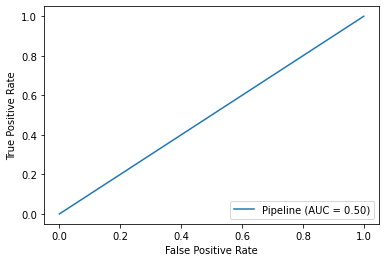

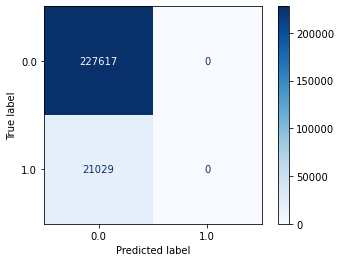

In [19]:
dummy_info.print_summary()

In [20]:
dummy_pca = ImPipeline(steps=[
    ('ct', ct_continous),
    ('sm', SMOTE(sampling_strategy=0.25, random_state=1)),
    ('pca', PCA(n_components=.9)),
    ('dummy', DummyClassifier(strategy='most_frequent'))
]).fit(X_simple, y_simple)

In [21]:
dummy_pca_info = ModelWithCV(dummy_simple, 'dummy', X_simple, y_simple)

 
  Recall is 0.0 CV Results for `dummy` model:
            0.91543 ± 0.00001 accuracy
         <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000025ACB9B7760> <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x0000025ACBAF3610>


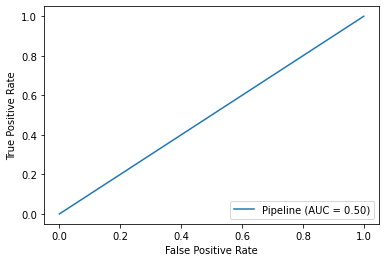

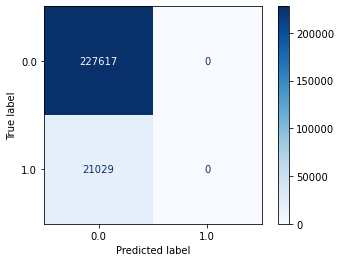

In [22]:
dummy_pca_info.print_summary()

## Simple Model 1 - Logistic Regression

In [23]:
log1 = ImPipeline(steps=[
    ('ct', ct_continous),
    ('sm', SMOTE(sampling_strategy= 0.25, random_state=1)),
    ('log',LogisticRegression(random_state=42))
]).fit(X_simple,y_simple)

In [24]:
log1_info = ModelWithCV(log1, 'log1', X_simple, y_simple)

 
  Recall is 0.1460839792667269 CV Results for `log1` model:
            0.90200 ± 0.00023 accuracy
         <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000025ACD09BD60> <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x0000025ACD09BE80>


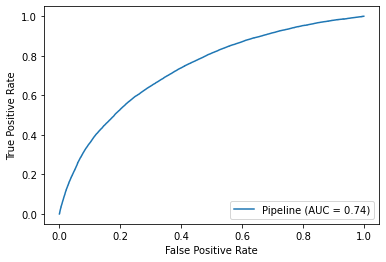

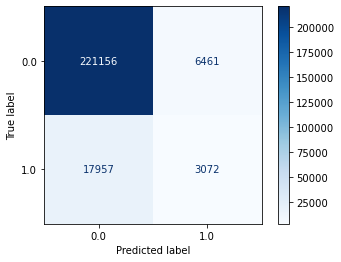

In [25]:
log1_info.print_summary()

The LogisticRegression has a better F1 score of .14 compared to the dummy classifier which had a F1 score of 0. The ROC-AUC score is also better by 0.19. The AUC of the logistic regression is 0.69 while the dummy was 0.50. However, the accuracy is slightly lower by 1-2% on the logistic regression (90%) compared to the dummy (92%).

In [26]:
log_pca = ImPipeline(steps=[
    ('ct', ct_continous),
    ('sm', SMOTE(sampling_strategy= 0.25, random_state=1)),
    ('pca', PCA(n_components=.9)),
    ('log',LogisticRegression(random_state=42))
]).fit(X_simple,y_simple)

In [27]:
log_pca_info = ModelWithCV(log_pca, 'log_pca', X_simple, y_simple)

 
  Recall is 0.14532312520804602 CV Results for `log_pca` model:
            0.90198 ± 0.00017 accuracy
         <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000025ACB9B7190> <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x0000025ACBB81640>


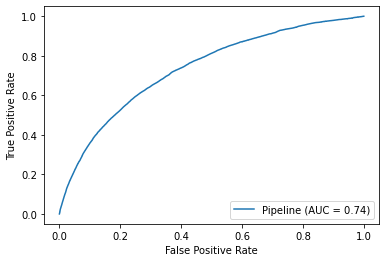

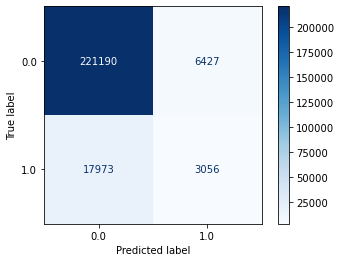

In [28]:
log_pca_info.print_summary()

## Simple Model 2 - KNN

In [29]:
knn1 = ImPipeline(steps=[
    ('ct', ct_continous),
    ('sm', SMOTE(sampling_strategy= 0.25, random_state=1)),
    ('knn1',KNeighborsClassifier())
]).fit(X_simple,y_simple)

In [30]:
knn1_info = ModelWithCV(knn1, 'knn', X_simple, y_simple)

 
  Recall is 0.5620333824718247 CV Results for `knn` model:
            0.84891 ± 0.00096 accuracy
         <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000025ACD1328E0> <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x0000025ACD0619D0>


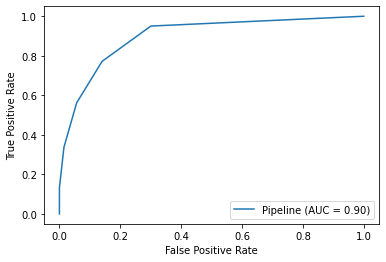

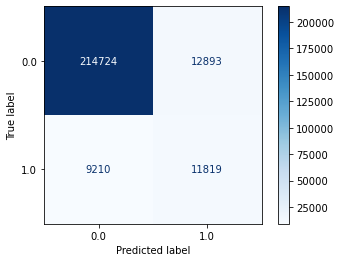

In [31]:
knn1_info.print_summary()

The KNN did much better compared to the logistic regression. It has a F1 score of about .50 compared to the logistic regression (0.14). The ROC-AUC is also much better at 0.89 versus 0.69. The accuracy is much lower though, dropping to about 84% compare to 90% from the logistic or even the dummy which was about 92%.

## Simple Model 3 - Decision Tree

In [32]:
dtree1 = ImPipeline(steps=[
    ('ct', ct_continous),
    ('sm', SMOTE(sampling_strategy=0.25, random_state=1)),
    ('dtree', DecisionTreeClassifier(random_state=42) )
]).fit(X_simple,y_simple)

 
  Recall is 0.7223358219601502 CV Results for `dtree1` model:
            0.85663 ± 0.00055 accuracy
         <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000025AA7BE7520> <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x0000025ACD09B280>


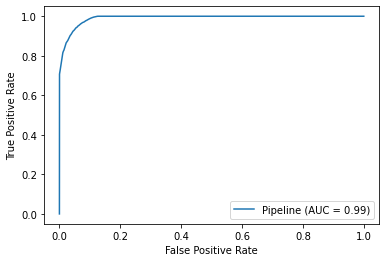

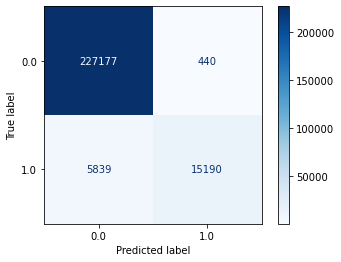

In [33]:
dtree1_info = ModelWithCV(dtree1, 'dtree1', X_simple, y_simple)
dtree1_info.print_summary()

Our decision tree performed much better with an F1 score of 0.80, ROC-AUC of 0.99 but with an accuracy of 86%. Though, the ROC-AUC being 0.99 indicates that it is more than likely overfit and as such we will have to take that into account.

In [34]:
X_simple

,physical_health,mental_health,general_health,sleep,weight_kg,height_m,alcohol_consumption_30
248413,0.0,0.0,1.0,6.0,73.0,165.0,5.0
91003,0.0,0.0,3.0,6.0,55.0,175.0,0.0
148075,0.0,10.0,1.0,6.0,50.0,168.0,4.0
273325,0.0,0.0,3.0,8.0,55.0,152.0,0.0
193206,0.0,0.0,1.0,8.0,62.0,165.0,4.0
...,...,...,...,...,...,...,...
298694,0.0,0.0,1.0,8.0,82.0,168.0,30.0
82524,15.0,0.0,3.0,7.0,100.0,160.0,0.0
289919,0.0,0.0,2.0,8.0,68.0,168.0,2.0
130280,5.0,5.0,5.0,6.0,91.0,175.0,0.0


In [35]:
#rf
rf1 = ImPipeline(steps=[
    ('ct', ct_continous),
    ('sm', SMOTE(sampling_strategy=0.25, random_state=1)),
    ('rf1', RandomForestClassifier(random_state=42) )
]).fit(X_simple,y_simple)

In [36]:
rf1_info = ModelWithCV(rf1, 'rf1', X_simple, y_simple)

 
  Recall is 0.7488706072566456 CV Results for `rf1` model:
            0.89388 ± 0.00049 accuracy
         <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000025ADC90C370> <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x0000025ADC90C340>


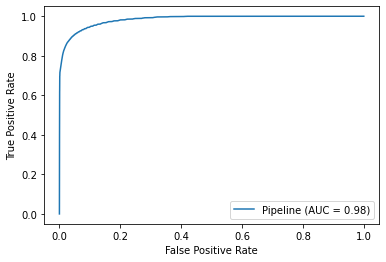

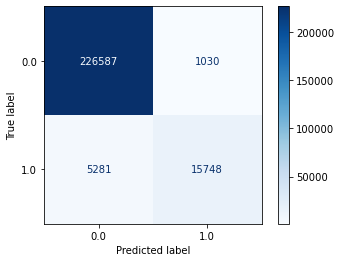

In [37]:
rf1_info.print_summary()

# Simple Model 4 - XGBoost

In [38]:
xg1 = ImPipeline(steps=[
    ('ct', ct_continous),
    ('sm', SMOTE(sampling_strategy=0.25, random_state=1)),
    ('xg1', XGBClassifier(random_state= 42) )
]).fit(X_simple,y_simple)

 
  Recall is 0.051642969232964 CV Results for `xg1` model:
            0.90984 ± 0.00060 accuracy
         <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000025A8124D850> <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x0000025ADC91D9A0>


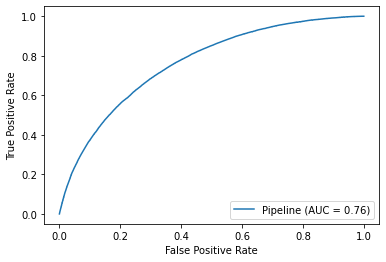

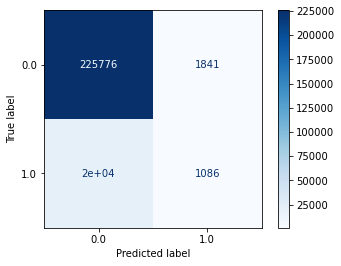

In [39]:
xg1_info = ModelWithCV(xg1, 'xg1', X_simple, y_simple)
xg1_info.print_summary()

# Grid Search on best models

**Due to  decision trees and random forest being prone to overfitting and based on our ROC-AUC it is for me, I added the KNN model to grid search. I will not grid search decision tree and random forest more than once as it is a rabbit hole that I can fall into and cause the model to be over fit.**

### KNN

In [40]:
knn_params = {
    'knn1__n_neighbors': [5,10,20],
    'knn1__metric' : ['minkowski', 'euclidean']
}

In [41]:
knn_gs = GridSearchCV(estimator=knn1, param_grid=knn_params, n_jobs=-1).fit(X_simple,y_simple)

In [42]:
joblib.dump(knn_gs, './joblib_models/knn_gs.sav')

['./joblib_models/knn_gs.sav']

In [43]:
knn_gs.best_estimator_

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('scale',
                                                  Pipeline(steps=[('scale_impute',
                                                                   IterativeImputer(estimator=BayesianRidge(),
                                                                                    random_state=42)),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['physical_health',
                                                   'mental_health',
                                                   'general_health', 'sleep',
                                                   'weight_kg', 'height_m',
                                                   'alcohol_consumption_30'])])),
                ('sm', SMOTE(random_state=1, sampling_strategy=0.25)),
              

In [44]:
knn1_tune = ModelWithCV(knn_gs.best_estimator_,'knn1_tune', X_simple, y_simple)

In [45]:
joblib.dump(knn1_tune, './joblib_models/knn1_tune.sav')

['./joblib_models/knn1_tune.sav']

 
  Recall is 0.29834989776023585 CV Results for `knn1_tune` model:
            0.88056 ± 0.00088 accuracy
         <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000025A80EE7D00> <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x0000025A80E25D30>


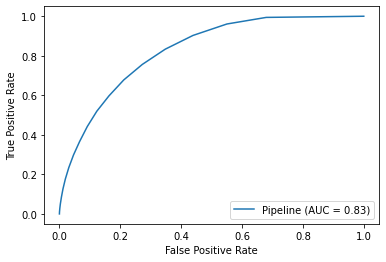

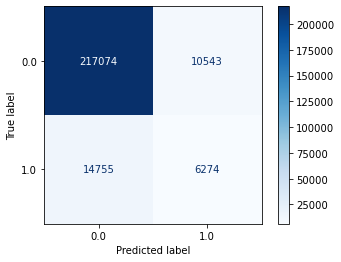

In [46]:
knn1_tune.print_summary()

### Decision Trees

In [47]:
dtree1_params = {
    'dtree__criterion' : ['gini', 'entropy'],
    'dtree__max_depth' : [5,10,20],
    'dtree__min_samples_split' : [1000, 10000, 50000]
}

In [48]:
dtree1_gs = GridSearchCV(estimator=dtree1, param_grid=dtree1_params, n_jobs=-1, verbose=3).fit(X_simple,y_simple)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.2min finished


In [49]:
joblib.dump(dtree1_gs, './joblib_models/dtree1_gs.sav')

['./joblib_models/dtree1_gs.sav']

In [50]:
dtree1_tune = ModelWithCV(dtree1_gs.best_estimator_,'dtree1_tune', X_simple, y_simple)

In [51]:
joblib.dump(dtree1_tune, './joblib_models/dtree1_tune.sav')

['./joblib_models/dtree1_tune.sav']

 
  Recall is 0.14855675495743972 CV Results for `dtree1_tune` model:
            0.91543 ± 0.00001 accuracy
         <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000025ACD07B220> <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x0000025ACBA136A0>


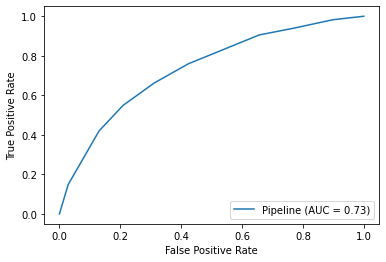

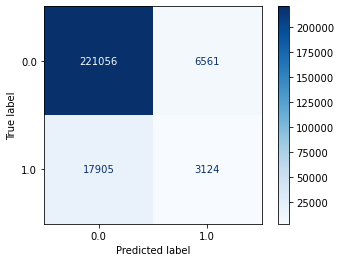

In [52]:
dtree1_tune.print_summary()

## Random Forest

In [53]:
rf_params = {
    'rf1__n_estimators' : [100,200],
    'rf1__criterion' : ['gini', 'entropy'],
    'rf1__max_depth' : [5,10,20]
}

In [54]:
rf_gs = GridSearchCV(estimator=rf1, param_grid=rf_params, n_jobs=-1,verbose=3).fit(X_simple,y_simple)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  60 | elapsed:  4.3min remaining:   52.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  4.9min finished


In [55]:
joblib.dump(rf_gs, './joblib_models/rf_gs.sav')

['./joblib_models/rf_gs.sav']

In [56]:
rf_gs_info = ModelWithCV(rf_gs.best_estimator_, 'rf_gs', X_simple, y_simple)

In [57]:
joblib.dump(rf_gs_info, './joblib_models/rf_gs_info.sav')

['./joblib_models/rf_gs_info.sav']

 
  Recall is 0.058918636169099814 CV Results for `rf_gs` model:
            0.91269 ± 0.00146 accuracy
         <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000025ACD0893A0> <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x0000025ACBA9E460>


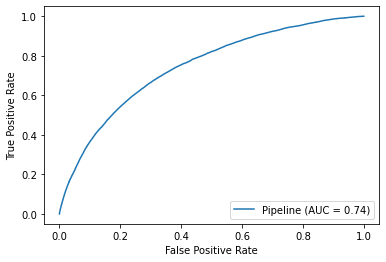

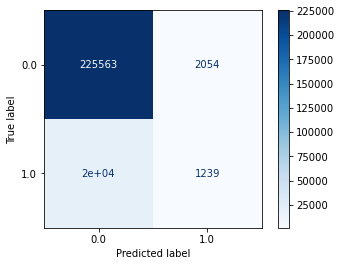

In [58]:
rf_gs_info.print_summary()

# Does only Categorical perform better?

In [59]:
X_categorical = X_train.drop(columns = continous)

In [60]:
y_categorical = y_train

In [61]:
dummy_cate = ImPipeline(steps=[
    ('ct', ct_categorical),
    ('sm', SMOTE(sampling_strategy=0.25, random_state=1)),
    ('dummy', DummyClassifier(strategy='most_frequent'))
]).fit(X_categorical,y_categorical)

C:\Users\xiao\anaconda3\envs\learn-env\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [62]:
dummy_cate_info = ModelWithCV(dummy_cate, 'dummy_cate', X_categorical, y_categorical)

C:\Users\xiao\anaconda3\envs\learn-env\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"
C:\Users\xiao\anaconda3\envs\learn-env\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"
C:\Users\xiao\anaconda3\envs\learn-env\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


 
  Recall is 0.0 CV Results for `dummy_cate` model:
            0.91543 ± 0.00001 accuracy
         <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000025ACD103F40> <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x0000025ACB9F0610>


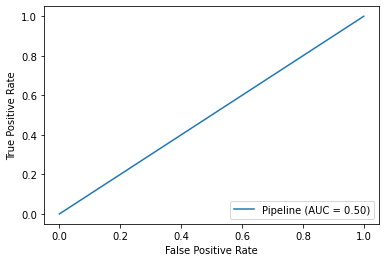

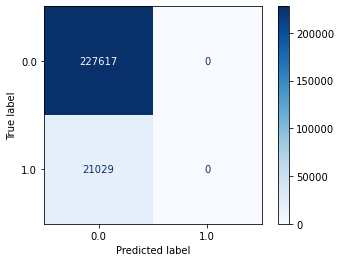

In [63]:
dummy_cate_info.print_summary()

In [ ]:
dummy_cate_pca = ImPipeline(steps=[
    ('ct', ct_categorical),
    ('sm', SMOTE(sampling_strategy=0.25, random_state=1)),
    ('pca', PCA(n_components=.9)),
    ('dummy', DummyClassifier(strategy='most_frequent'))
]).fit(X_categorical,y_categorical)

In [ ]:
dummy_cate_pca_info = ModelWithCV(dummy_cate_pca, 'dummy_cate_pca', X_categorical, y_categorical)

In [ ]:
dummy_cate_pca_info.print_summary()

In [ ]:
log_cate = ImPipeline(steps=[
    ('ct', ct_categorical),
    ('sm', SMOTE(sampling_strategy= 0.25, random_state=1)),
    ('log',LogisticRegression(random_state=42))
]).fit(X_categorical,y_categorical)

In [ ]:
log_cate_info = ModelWithCV(log_cate, 'log_cate', X_categorical, y_categorical)

In [ ]:
joblib.dump(log_cate_info, './joblib_models/log_cate_info.sav')

In [ ]:
log_cate_info.print_summary()

In [ ]:
log_pca_cate = ImPipeline(steps=[
    ('ct', ct_categorical),
    ('sm', SMOTE(sampling_strategy= 0.25, random_state=1)),
    ('pca_cate', PCA(n_components=.9)),
    ('log_cate',LogisticRegression(random_state=42))
]).fit(X_categorical,y_categorical)

In [ ]:
log_pca_cate_info = ModelWithCV(log_pca_cate, 'log_pca_cate', X_categorical, y_categorical)

In [ ]:
joblib.dump(log_pca_cate_info, './joblib_models/log_pca_cate_info.sav')

In [ ]:
log_pca_cate_info.print_summary()

### KNN

In [ ]:
knn_cate = ImPipeline(steps=[
    ('ct', ct_categorical),
    ('sm', SMOTE(sampling_strategy= 0.25, random_state=1)),
    ('knn_cate',KNeighborsClassifier())
]).fit(X_categorical,y_categorical)

In [ ]:
knn_cate_info = ModelWithCV(knn_cate, 'knn_cate', X_categorical, y_categorical)

In [ ]:
joblib.dump(knn_cate_info, './joblib_models/knn_cate_info.sav')

In [ ]:
knn_cate_info.print_summary()

### Decision Tree/ RF

In [ ]:
dtree_cate = ImPipeline(steps=[
    ('ct', ct_categorical),
    ('sm', SMOTE(sampling_strategy=0.25, random_state=1)),
    ('dtree', DecisionTreeClassifier(random_state=42) )
]).fit(X_categorical,y_categorical)

In [ ]:
dtree_cate_info = ModelWithCV(dtree_cate, 'dtree_cate', X_categorical, y_categorical)

In [ ]:
joblib.dump(dtree_cate_info, './joblib_models/dtree_cate_info.sav')

In [ ]:
dtree_cate_info.print_summary()

In [ ]:
rf_cate = ImPipeline(steps=[
    ('ct', ct_categorical),
    ('sm', SMOTE(sampling_strategy=0.25, random_state=1)),
    ('rf_cate', RandomForestClassifier(random_state=42) )
]).fit(X_categorical,y_categorical)

In [ ]:
rf_cate_info = ModelWithCV(rf_cate, 'rf_cate', X_categorical, y_categorical)

In [ ]:
joblib.dump(rf_cate_info, './joblib_models/rf_cate_info.sav')

In [ ]:
rf_cate_info.print_summary()

### XGBoost

In [ ]:
xg_cate = ImPipeline(steps=[
    ('ct', ct_categorical),
    ('sm', SMOTE(sampling_strategy=0.25, random_state=1)),
    ('xg_cate', XGBClassifier(random_state= 42) )
]).fit(X_categorical,y_categorical)

In [ ]:
xg_cate_info = ModelWithCV(xg_cate, 'xg_cate', X_categorical, y_categorical)

In [ ]:
xg_cate_info.print_summary()

In [ ]:
joblib.dump(xg_cate_info, './joblib_models/xg_cate_info.sav')

### Gridsearch on the best model

In [ ]:
rf_cate_params = {
    'rf_cate__n_estimators': [100, 200],
    'rf_cate__criterion': ['gini', 'entropy'],
    'rf_cate__max_depth': [10, 20, 30]
}

In [ ]:
rf_cate_gs = GridSearchCV(estimator=rf_cate, param_grid=rf_cate_params, n_jobs=-1,verbose=3).fit(X_categorical,y_categorical)

In [ ]:
joblib.dump(rf_cate_gs, './joblib_models/rf_cate_gs.sav')

In [ ]:
rf_cate_info = ModelWithCV(rf_cate_gs.best_estimator_, 'rf_cate_gs', X_categorical, y_categorical)

In [ ]:
joblib.dump(rf_cate_info, './joblib_models/rf_cate_info.sav')

In [ ]:
rf_cate_info.print_summary()

# Putting all our features into our model

In [ ]:
dummy_all = ImPipeline(steps=[
    ('ct', ct),
    ('sm', SMOTE(sampling_strategy=0.25, random_state=1)),
    ('dummy', DummyClassifier(strategy='most_frequent'))
]).fit(X_train, y_train)

In [ ]:
dummy_all_info = ModelWithCV(dummy_all, 'dummy_all', X_train, y_train)

In [ ]:
dummy_all_info.print_summary()

### Logistic Model

In [ ]:
log2 = ImPipeline(steps=[
    ('ct', ct),
    ('sm', SMOTE(sampling_strategy= 0.25, random_state=1, n_jobs=-2)),
    ('log2',LogisticRegression(random_state=42, n_jobs= -1))
]).fit(X_train, y_train)

In [ ]:
joblib.dump(log2, './joblib_models/log2.sav')

In [ ]:
log2_info = ModelWithCV(log2, 'log2', X_train, y_train)

In [ ]:
joblib.dump(log2_info, './joblib_models/log2_info.sav')

In [ ]:
log2_info.print_summary()

### KNN

In [ ]:
knn2 = ImPipeline(steps=[
    ('ct', ct),
    ('sm', SMOTE(sampling_strategy= 0.25, random_state=1)),
    ('knn2',KNeighborsClassifier( n_jobs= -1))
]).fit(X_train, y_train)

In [ ]:
joblib.dump(knn2, './joblib_models/knn2.sav')

In [ ]:
knn2_info = ModelWithCV(knn2, 'knn2', X_train, y_train)

In [ ]:
joblib.dump(knn2_info, './joblib_models/knn2_info.sav')

In [ ]:
knn2_info.print_summary()

### Decision Tree

In [ ]:
dtree2 = ImPipeline(steps=[
    ('ct', ct),
    ('sm', SMOTE(sampling_strategy=0.25, random_state=1)),
    ('dtree2', DecisionTreeClassifier(random_state=42) )
]).fit(X_train, y_train)

In [ ]:
joblib.dump(dtree2, './joblib_models/dtree2.sav')

In [ ]:
dtree2_info = ModelWithCV(dtree2, 'dtree2', X_train, y_train)

In [ ]:
joblib.dump(dtree2_info, './joblib_models/dtree2_info.sav')

In [ ]:
dtree2_info.print_summary()

### Random forest

In [ ]:
rf2 = ImPipeline(steps=[
    ('ct', ct),
    ('sm', SMOTE(sampling_strategy=0.25, random_state=1)),
    ('rf', RandomForestClassifier(random_state=42) )
]).fit(X_train, y_train)

In [ ]:
joblib.dump(rf2, './joblib_models/rf2.sav')

In [ ]:
rf2_info = ModelWithCV(rf2, 'rf2', X_train, y_train)

In [ ]:
joblib.dump(rf2_info, './joblib_models/rf2_info.sav')

In [ ]:
rf2_info.print_summary()

### XGBoost

In [ ]:
xg2 = ImPipeline(steps=[
    ('ct', ct),
    ('sm', SMOTE(sampling_strategy=0.25, random_state=1)),
    ('xg2', XGBClassifier(random_state= 42) )
]).fit(X_train, y_train)

In [ ]:
joblib.dump(xg2, './joblib_models/xg2.sav')

In [ ]:
xg2_info = ModelWithCV(xg2, 'xg2', X_train, y_train)

In [ ]:
joblib.dump(xg2_info, './joblib_models/xg2_info.sav')

In [ ]:
xg2_info.print_summary()

**Due to computational time just running these models, I will not perform a grid search on these model.**

# Model Evaluation